In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
np.random.seed(123) # setting the random seed to 123
print("Seed:", np.random.get_state()[1][0]) # printing the seed

# generate a random array of shape (3,2)
arr = np.random.rand(3,2)
print(arr)

Seed: 123
[[0.69646919 0.28613933]
 [0.22685145 0.55131477]
 [0.71946897 0.42310646]]


In [4]:
x = np.linspace(-3*np.pi, 3*np.pi, 200)
x = x.reshape(-1,1)

In [5]:
np.random.seed(42)
y = np.random.normal(np.sin(x) / x, 0.5*np.abs(np.sin(x)/x), x.shape)
# y = np.random.normal(np.sin(x) / x, 0.1, x.shape)
y = y.reshape(-1)

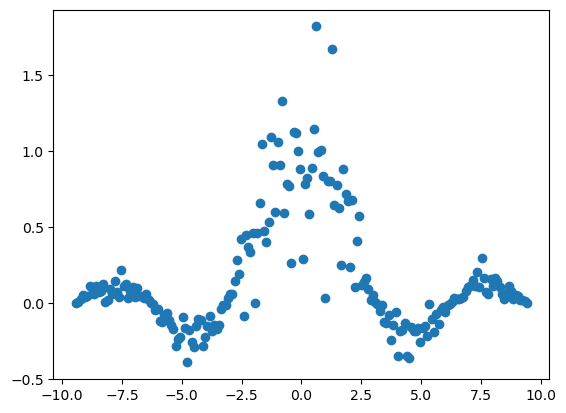

In [6]:
plt.scatter(x, y)

In [75]:
from rgboost.gbm import MyGradientBoostingRegressor
from rgboost.lossfunc import SquareLoss, KernelBasedLossFunction, KernelBasedSquareLoss

from rgboost.kernels import rbf_kernel
from functools import partial
from rgboost.estimator import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from rgboost.combined_estimator import EstimatorCollections

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, test_size=0.2, random_state=42)

In [36]:
import xgboost as xgb

In [9]:
# gbr = GradientBoostingRegressor(n_estimators=300,
#                                 learning_rate=0.1,
#                                 max_depth=3,
#                                 loss='squared_error',
#                                 random_state=42)
# mgbr = MyGradientBoostingRegressor(base_estimator=KernelRidge(alpha=1),
#                                    n_estimators=100,
#                                    learning_rate=0.5,
#                                    lf=KernelBasedSquareLoss(kernel=partial(rbf_kernel, gamma=100)))
n = 2000
gbr = MyGradientBoostingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                   n_estimators=n,
                                   learning_rate=0.1,
                                   loss_=SquareLoss())

mgbr = MyGradientBoostingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                   n_estimators=n,
                                   learning_rate=0.1,
                                   loss_=KernelBasedSquareLoss(kernel=partial(rbf_kernel, gamma=100)))


kgbr = MyGradientBoostingRegressor(base_estimator=KernelRidge(alpha=1),
                                   n_estimators=n,
                                   learning_rate=0.1,
                                   loss_=SquareLoss())

rkgbr = MyGradientBoostingRegressor(base_estimator=KernelRidge(alpha=1),
                                   n_estimators=n,
                                   learning_rate=0.1,
                                   loss_=KernelBasedSquareLoss(kernel=partial(rbf_kernel, gamma=100)))

comb_model = EstimatorCollections({'tree': DecisionTreeRegressor(max_depth=3),
                                   'kernel_ridge': KernelRidge(alpha=1)})

ckgbr = MyGradientBoostingRegressor(base_estimator=comb_model,
                                    n_estimators=n,
                                    learning_rate=0.1,
                                    loss_=SquareLoss())

crkgbr = MyGradientBoostingRegressor(base_estimator=comb_model,
                                     n_estimators=n,
                                     learning_rate=0.1,
                                     loss_=KernelBasedSquareLoss(kernel=partial(rbf_kernel, gamma=100)))

In [10]:
gbr.fit(X_train, y_train)
mgbr.fit(X_train, y_train)
kgbr.fit(X_train, y_train)
rkgbr.fit(X_train, y_train)
ckgbr.fit(X_train, y_train)
crkgbr.fit(X_train, y_train)
mxgb.fit(X_train, y_train)

Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta: 3.4709
Chosen theta:

NameError: name 'mxgb' is not defined

In [ ]:
# ssss = mxgb.get_booster()
# from xgboost.core import Booster
# booster = mxgb.get_booster()
# trees = booster.get_dump()
# tree_models = []
# for tree in trees:
#     tree_model = Booster()
#     tree_model.load_model(io.StringIO(tree))
#     tree_models.append(tree_model)

In [ ]:
fig, ax = plt.subplots()
ax.plot([np.mean((y_test-s)**2)**0.5 for s in gbr.get_train_process(X_test)], color='red', label='GBDT')
ax.plot([np.mean((y_test-s)**2)**0.5 for s in mgbr.get_train_process(X_test)], color='blue', label='GBDT, Revised-gradient')
ax.plot([np.mean((y_test-s)**2)**0.5 for s in kgbr.get_train_process(X_test)], color='violet', label='GBM, Kernel-based')
ax.plot([np.mean((y_test-s)**2)**0.5 for s in rkgbr.get_train_process(X_test)], color='green', label='GBM, Kernel-based, Revised-gradient')
ax.plot([np.mean((y_test-s)**2)**0.5 for s in ckgbr.get_train_process(X_test)], color='orange', label='GBM, Kernel and Tree')
ax.plot([np.mean((y_test-s)**2)**0.5 for s in crkgbr.get_train_process(X_test)], color='black', label='GBM, Kernel and Tree, Revised-gradient')
ax.plot([np.mean((y_test-s)**2)**0.5 for s in mxgb._npredict(X_test)], color='red', label='GBM, Kernel-based, Revised-gradient')

ax.grid()
ax.legend()
ax.set_xlabel('Iteration')
ax.set_ylabel('Test MSE')
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000])
ax.set_xticklabels([r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$'])
plt.tight_layout()
# plt.savefig('../figure/test.pdf')

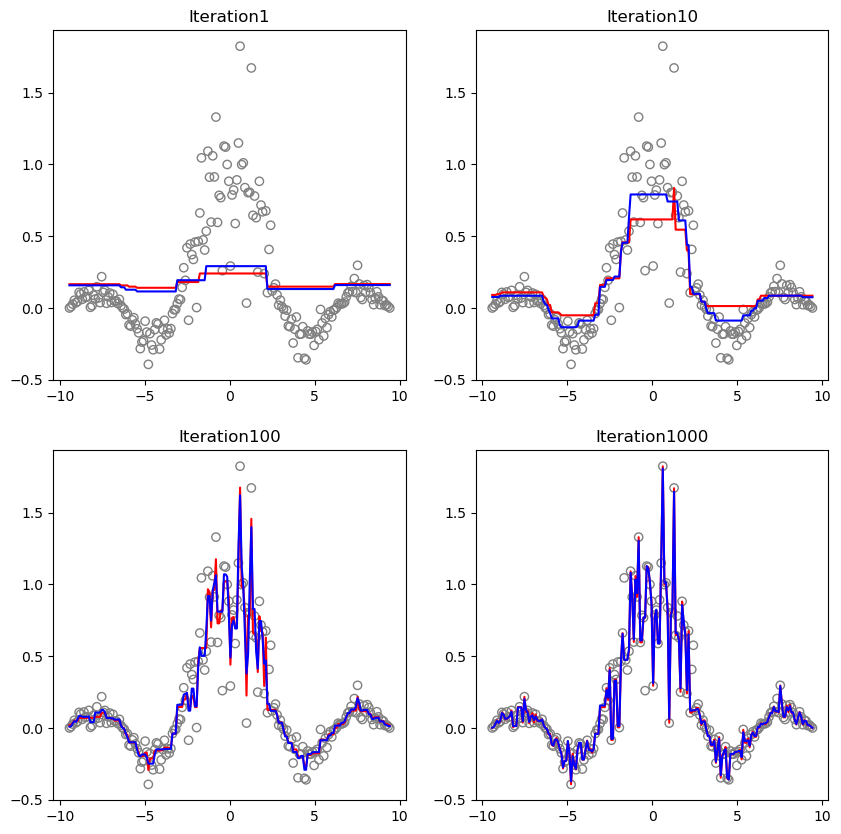

In [20]:
# print(np.mean((y-gbr.predict(x))**2)**0.5)
# print(np.mean((y-mgbr.predict(x))**2)**0.5)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = [0, 9, 99, 999]
for num, ax in enumerate(axs.flatten()):
    ax.scatter(x,y, facecolors='none',edgecolors='grey')
    ax.plot(x, gbr.get_train_process(x)[idx[num]], color='red')
    ax.plot(x, mgbr.get_train_process(x)[idx[num]], color='blue')
    ax.set_title(f"Iteration{idx[num]+1}")
fig.savefig('../figure/train_process_1.pdf')

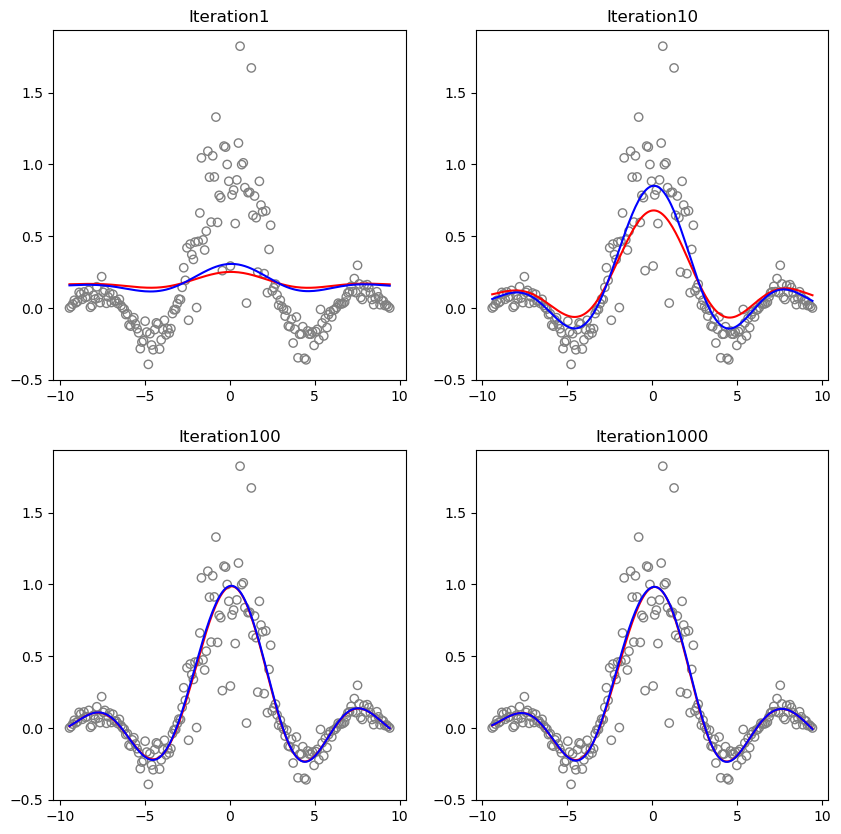

In [21]:
# print(np.mean((y-gbr.predict(x))**2)**0.5)
# print(np.mean((y-mgbr.predict(x))**2)**0.5)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = [0, 9, 99, 999]
for num, ax in enumerate(axs.flatten()):
    ax.scatter(x,y, facecolors='none',edgecolors='grey')
    ax.plot(x, kgbr.get_train_process(x)[idx[num]], color='red')
    ax.plot(x, rkgbr.get_train_process(x)[idx[num]], color='blue')
    ax.set_title(f"Iteration{idx[num]+1}")
fig.savefig('../figure/train_process_k.pdf')

In [71]:
import warnings
warnings.filterwarnings('ignore')

## Boston


In [167]:
import numpy as np
from sklearn.datasets import load_boston

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [168]:
n = 50
gbr = MyGradientBoostingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                   n_estimators=n,
                                   learning_rate=0.1,
                                   loss_=SquareLoss())

mgbr = MyGradientBoostingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                   n_estimators=n,
                                   learning_rate=0.1,
                                   loss_=KernelBasedSquareLoss(kernel=partial(rbf_kernel, gamma=100)))


In [169]:
from sklearn.metrics import mean_squared_error

In [170]:
gbr.fit(X_train, y_train)
mgbr.fit(X_train, y_train)
# kgbr.fit(X_train, y_train)

In [171]:
mean_squared_error(y_test, gbr.predict(X_test))

9.149897116007875

In [172]:
mean_squared_error(y_test, mgbr.predict(X_test))

9.475076085771095

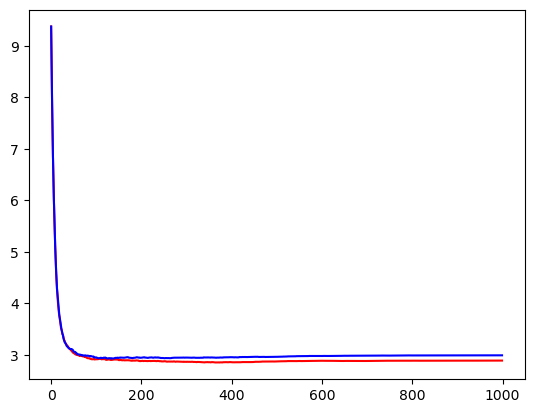

In [133]:
fig, ax = plt.subplots()
ax.plot([np.mean((y_test-s)**2)**0.5 for s in gbr.get_train_process(X_test)], color='red', label='GBDT')
ax.plot([np.mean((y_test-s)**2)**0.5 for s in mgbr.get_train_process(X_test)], color='blue', label='GBDT')
# ax.plot([np.mean((y_test-s)**2)**0.5 for s in kgbr.get_train_process(X_test)], color='green', label='GBDT')
plt.show()

In [76]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb.predict(X_test)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

In [77]:
mse

8.703616478670394

In [81]:
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load the Boston Housing dataset
boston = load_boston()

# Define the cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store the mean squared errors of the models
mse_list = []

# Loop over the folds
for train_index, test_index in kf.split(boston.data):

    # Split the dataset into training and testing sets for this fold
    X_train, X_test = boston.data[train_index], boston.data[test_index]
    y_train, y_test = boston.target[train_index], boston.target[test_index]

    # Fit the XGBoost Regressor model
    gbr = MyGradientBoostingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                       n_estimators=100,
                                       learning_rate=0.1,
                                       loss_=SquareLoss())
    gbr.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = gbr.predict(X_test)

    # Compute the mean squared error of the predictions and add it to the list
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Compute the average mean squared error of the models
avg_mse = np.mean(mse_list)
print("Average Mean Squared Error:", avg_mse)


Average Mean Squared Error: 8.4926854392696


In [100]:
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load the Boston Housing dataset
boston = load_boston()

# Define the cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store the mean squared errors of the models
mse_list = []

# Loop over the folds
for train_index, test_index in kf.split(boston.data):

    # Split the dataset into training and testing sets for this fold
    X_train, X_test = boston.data[train_index], boston.data[test_index]
    y_train, y_test = boston.target[train_index], boston.target[test_index]

    # Fit the XGBoost Regressor model
    gbr = MyGradientBoostingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                       n_estimators=100,
                                       learning_rate=0.1,
                                       loss_=KernelBasedSquareLoss(kernel=partial(rbf_kernel, gamma=1)))
    gbr.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = gbr.predict(X_test)

    # Compute the mean squared error of the predictions and add it to the list
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Compute the average mean squared error of the models
avg_mse = np.mean(mse_list)
print("Average Mean Squared Error:", avg_mse)

Average Mean Squared Error: 8.497638358905629


In [73]:
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load the Boston Housing dataset
boston = load_boston()

# Define the cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store the mean squared errors of the models
mse_list = []

# Loop over the folds
for train_index, test_index in kf.split(boston.data):

    # Split the dataset into training and testing sets for this fold
    X_train, X_test = boston.data[train_index], boston.data[test_index]
    y_train, y_test = boston.target[train_index], boston.target[test_index]

    # Fit the XGBoost Regressor model
    xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = xgb.predict(X_test)

    # Compute the mean squared error of the predictions and add it to the list
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Compute the average mean squared error of the models
avg_mse = np.mean(mse_list)
print("Average Mean Squared Error:", avg_mse)


Average Mean Squared Error: 8.003261406197643


In [134]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load the Boston Housing dataset
boston = load_boston()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

# Initialize a dictionary of hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0],
}

# Initialize an instance of the XGBoost Regressor class
xgb = XGBRegressor(random_state=42)

# Initialize an instance of the GridSearchCV class
search_params = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object on the training set
search_params.fit(X_train, y_train)

# Print the best hyperparameters and mean squared error of the best model
print("Best Hyperparameters:", search_params.best_params_)
print("Best Mean Squared Error:", -search_params.best_score_)

# Make predictions on the testing set using the best model
best_model = search_params.best_estimator_
y_pred = best_model.predict(X_test)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best Hyperparameters: {'colsample_bytree': 0.75, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.75}
Best Mean Squared Error: 12.092847583363667
Mean Squared Error: 7.285575570106577


## Conditional Expectation

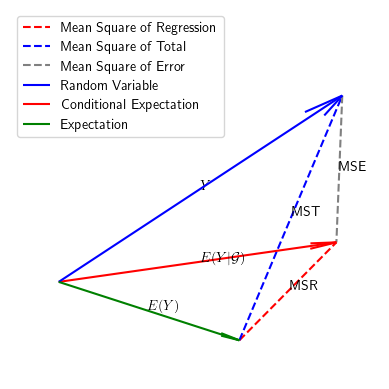

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["text.usetex"] = True
# 生成三维向量
v = np.array([1, 2, 3])

# 生成二维平面的基向量
e1 = np.array([1, 0, 0])
e2 = np.array([0, 1, 0])

# 计算投影向量
proj_v = np.dot(v, e1) * e1 + np.dot(v, e2) * e2
proj_c = np.array([1,0,0])
# 绘制图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot([0, v[0]], [0, v[1]], [0, v[2]], color='b', label='Original Vector')
# ax.plot([0, proj_v[0]], [0, proj_v[1]], [0, proj_v[2]], color='r', label='Projected Vector')
ax.plot([1, proj_v[0]], [0, proj_v[1]], [0, proj_v[2]], color='r', linestyle='--',label='Mean Square of Regression')
ax.plot([1, v[0]], [0, v[1]], [0, v[2]], color='b', linestyle='--',label='Mean Square of Total')
ax.plot([v[0], proj_v[0]], [v[1], proj_v[1]], [v[2], proj_v[2]],
        linestyle='--', color='grey', label='Mean Square of Error')
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='b', label='Random Variable',arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, proj_v[0], proj_v[1], proj_v[2], color='r', label=r'Conditional Expectation',arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, proj_c[0], proj_c[1], proj_c[2], color='g', label=r'Expectation',arrow_length_ratio=0.1)
# ax.set_xlim([-2, 3])
# ax.set_ylim([-2, 3])
# ax.set_zlim([-2, 3])
text_pos = (v + proj_v) / 2
ax.text(*text_pos, 'MSE')
ax.text(1,1,0,'MSR')
ax.text(1,1,1.5, 'MST')
ax.text(1/2,1,1.5, r'$Y$')
ax.text(1/2,0,0, r'$E(Y)$')
ax.text(1/2,1,0, r'$E(Y|\mathcal{G})$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
ax.set_axis_off()
plt.savefig('../figure/conditional.pdf')
plt.show()